**DESY AYURIANTI**

**TI 3E/07**

**2141720119**

# UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/UTS/dummy/65-E-4235-PAL-04-22_jpeg.rf.155650f9939670771e6eb7058cfc1f69.jpg')

In [5]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

166
380
3


In [6]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(63080, 3)

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

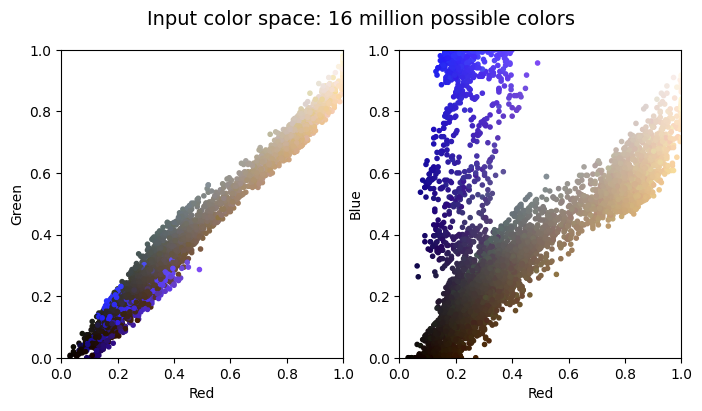

In [8]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [15]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendifinisikan jumlah kluster
jumlah_klaster = 2

#Membuat objek kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Pelatihan, Menyesuaikan model dengan data citra 
kmeans.fit(citra_reshape)

# Ambil cluster K-Means kemudian mengubah bentuk cluster ini agr cocok dengan bentuk asli citra 
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam 
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

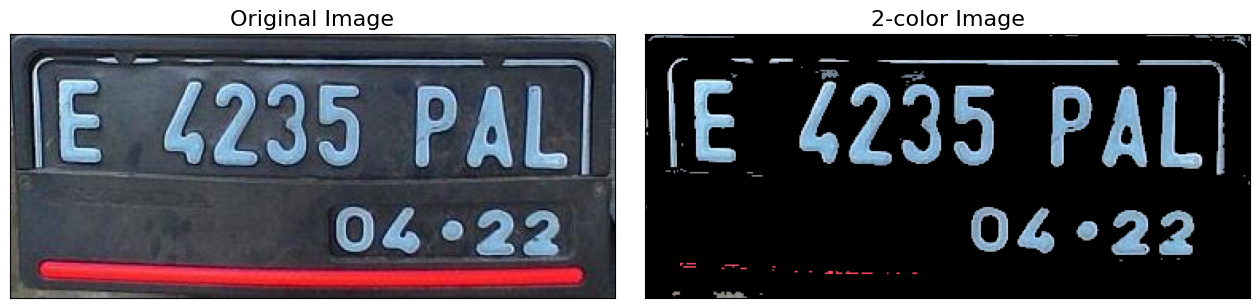

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat Nomor ke-2**

In [18]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/UTS/dummy/B3675BN_png.rf.9600a7928b9a7189a89e2cd84ce0e43c.jpg')

In [20]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1233
3


In [21]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(422919, 3)

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

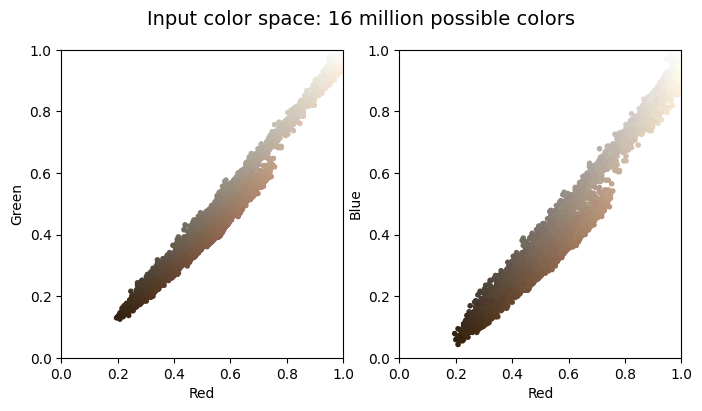

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [24]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendefinisikan jumlah cluster
jumlah_klaster = 2

# Membuat objek K-means
kmeans = KMeans(n_clusters=jumlah_klaster)

# Pelatihan, Menyesuaikan model dengan data citra 
kmeans.fit(citra_reshape)

# Ambil cluster K-Means kemudian mengubah bentuk cluster ini agr cocok dengan bentuk asli citra 
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam 
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0] 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

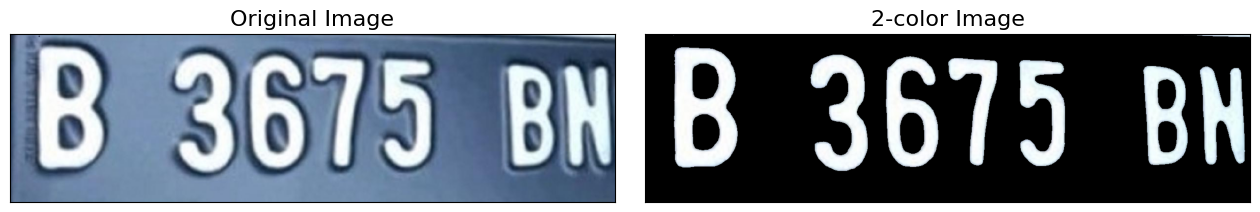

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat Nomor ke-3**

In [27]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/UTS/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg')

In [28]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

738
1023
3


In [29]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(754974, 3)

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

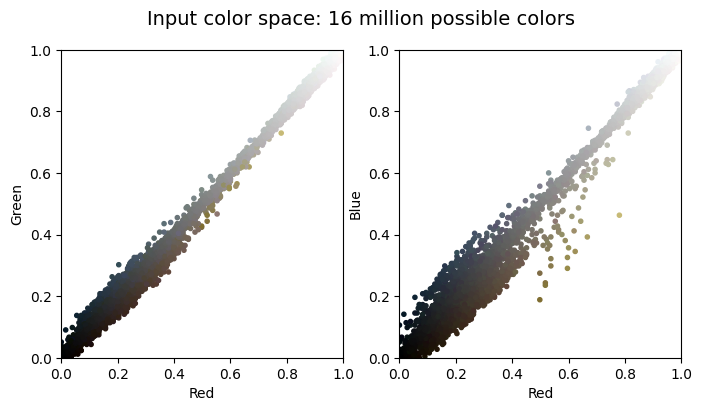

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [38]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

#Membuat objek Kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Pelatihan, Menyesuaikan model dengan citra 
kmeans.fit(citra_reshape)

# Ambil cluster K-Means kemudian mengubah bentuk cluster ini agr cocok dengan bentuk asli citra 
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna putih
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [1, 1, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

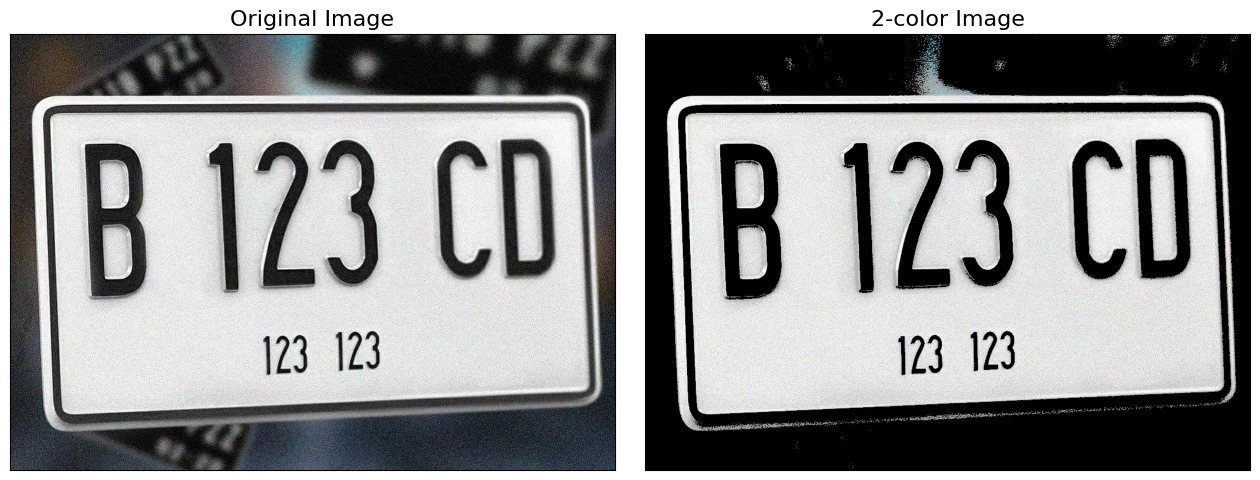

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat Nomor ke-4**

In [41]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/UTS/dummy/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg')

In [42]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [43]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [44]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

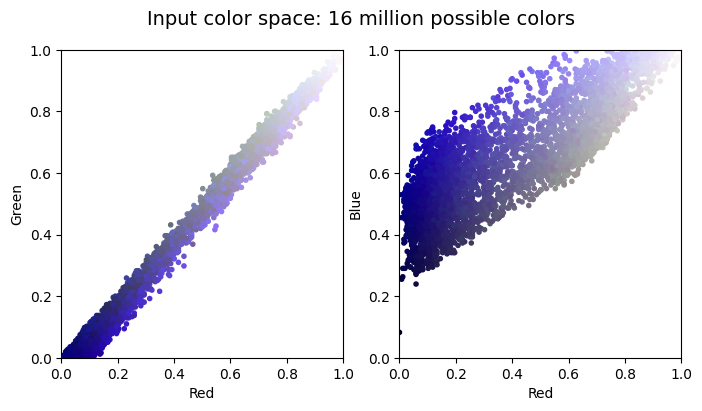

In [45]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [46]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Membuat objek Kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Pelatihan, Menyesuaikan model dengan citra asli
kmeans.fit(citra_reshape)

# Ambil cluster K-Means kemudian mengubah bentuk cluster ini agr cocok dengan bentuk asli citra 
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 255]  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

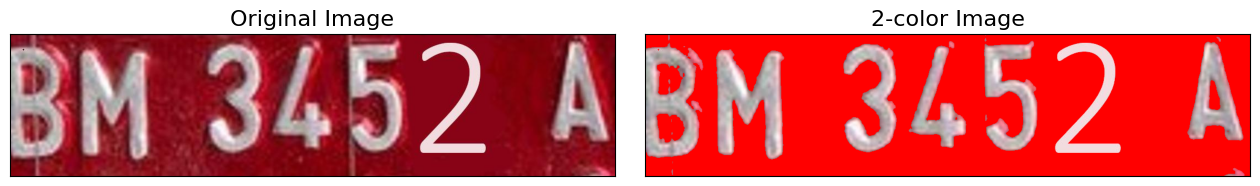

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)



---



**Plat Nomor ke-5**

In [67]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/UTS/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg')

In [68]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

303
670
3


In [69]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(203010, 3)

In [70]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

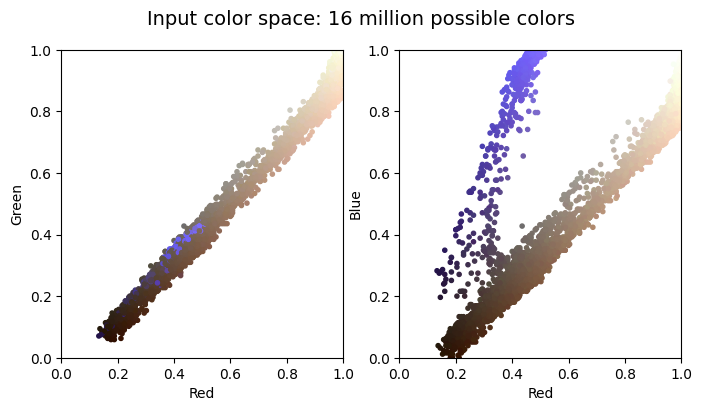

In [71]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [72]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendifinissikan jumlah cluster
jumlah_klaster = 3

# Membuat objek Kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Pelatihan, Menyesuaikan model dengan citra asli
kmeans.fit(citra_reshape)

# Ambil cluster K-Means kemudian mengubah bentuk cluster ini agr cocok dengan bentuk asli citra 
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam 
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0] 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

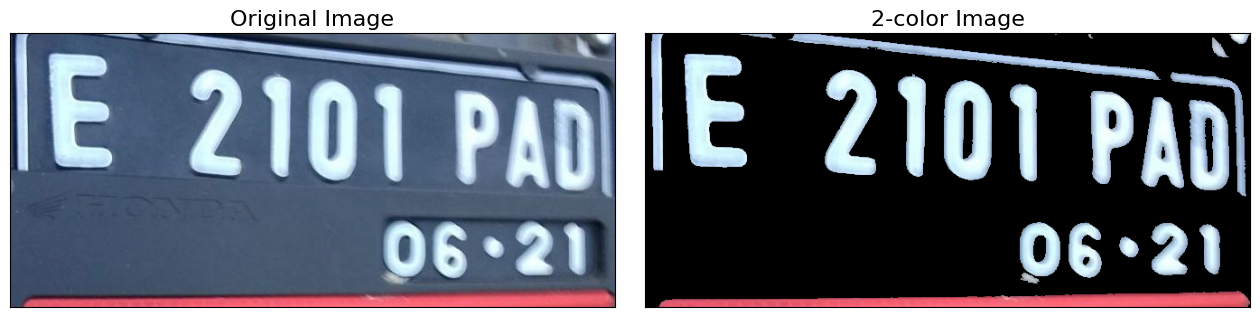

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)